<a href="https://colab.research.google.com/github/AndreAntonioCampos/FIAP_POS/blob/main/Tech_Challenge_Fase02_19.07.24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão de Fechamento Diário da IBOVESPA

## Introdução

O objetivo deste projeto é desenvolver um modelo preditivo para prever o fechamento diário da IBOVESPA utilizando dados históricos. Os dados utilizados incluem o fechamento diário do índice Bovespa, abrangendo o período de 2004 a 2024. Esta análise busca não apenas prever os valores futuros, mas também identificar padrões históricos e anomalias nos dados, fornecendo insights valiosos para a tomada de decisões financeiras.

## Visão Geral dos Dados (EDA):

### Coleta de Dados

Os dados foram capturados do site Investing.com, abrangendo o período de 01/01/2000 a 01/01/2024.

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
df_path = r'https://github.com/Tamireees/Tech_Challenge_Fase02/raw/main/Dados%20Hist%C3%B3ricos%20-%20Ibovespa%20(2004-2024).csv'

In [87]:
dados = pd.read_csv(df_path, sep=',', parse_dates=[0], index_col='Data')

In [88]:
dados.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
01.02.2024,128.481,127.752,128.481,127.284,"10,23M","0,57%"
31.01.2024,127.752,127.402,129.558,127.326,"12,50M","0,28%"
30.01.2024,127.402,128.492,128.492,127.105,"10,04M","-0,86%"
29.01.2024,128.503,128.970,129.068,127.853,"8,76M","-0,36%"
26.01.2024,128.967,128.196,129.252,127.869,"8,51M","0,62%"


In [89]:
dados.tail()


,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
08.01.2004,23.717,23.334,23.718,23.122,"436,74M","1,70%"
07.01.2004,23.320,23.576,23.899,23.320,"464,08M","-1,09%"
06.01.2004,23.576,23.532,23.976,23.180,"472,38M","0,19%"
05.01.2004,23.532,22.445,23.532,22.445,"496,71M","4,84%"
02.01.2004,22.445,22.233,22.450,22.208,"136,42M","0,94%"


In [90]:
dados.shape

(4974, 6)

### Exploração e limpeza dos dados

In [91]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4974 entries, 01.02.2024 to 02.01.2004
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Último    4974 non-null   float64
 1   Abertura  4974 non-null   float64
 2   Máxima    4974 non-null   float64
 3   Mínima    4974 non-null   float64
 4   Vol.      4973 non-null   object 
 5   Var%      4974 non-null   object 
dtypes: float64(4), object(2)
memory usage: 272.0+ KB


In [92]:
def convert_to_float(value):
    if isinstance(value, str):
        value = value.replace('.', '').replace(',', '.')
        if 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        elif 'K' in value:
            return float(value.replace('K', '')) * 1_000
    return value

In [93]:
dados['Vol.'] = dados['Vol.'].apply(convert_to_float)
print(dados.head())

             Último  Abertura   Máxima   Mínima        Vol.    Var%
Data                                                               
01.02.2024  128.481   127.752  128.481  127.284  10230000.0   0,57%
31.01.2024  127.752   127.402  129.558  127.326  12500000.0   0,28%
30.01.2024  127.402   128.492  128.492  127.105  10040000.0  -0,86%
29.01.2024  128.503   128.970  129.068  127.853   8760000.0  -0,36%
26.01.2024  128.967   128.196  129.252  127.869   8510000.0   0,62%


In [94]:
def convert_percentage_to_float(value):
    if isinstance(value, str) and '%' in value:
        value = value.replace('%', '').replace(',', '.')
        if '-' in value:
            value = value.replace('-', '')
            return float(value) * -1
        else:
            return float(value)
    return value

In [95]:
dados['Var%'] = dados['Var%'].apply(convert_percentage_to_float)

print(dados.head())

             Último  Abertura   Máxima   Mínima        Vol.  Var%
Data                                                             
01.02.2024  128.481   127.752  128.481  127.284  10230000.0  0.57
31.01.2024  127.752   127.402  129.558  127.326  12500000.0  0.28
30.01.2024  127.402   128.492  128.492  127.105  10040000.0 -0.86
29.01.2024  128.503   128.970  129.068  127.853   8760000.0 -0.36
26.01.2024  128.967   128.196  129.252  127.869   8510000.0  0.62


In [96]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4974 entries, 01.02.2024 to 02.01.2004
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Último    4974 non-null   float64
 1   Abertura  4974 non-null   float64
 2   Máxima    4974 non-null   float64
 3   Mínima    4974 non-null   float64
 4   Vol.      4973 non-null   float64
 5   Var%      4974 non-null   float64
dtypes: float64(6)
memory usage: 272.0+ KB


In [97]:
dados.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
01.02.2024,128.481,127.752,128.481,127.284,10230000.0,0.57
31.01.2024,127.752,127.402,129.558,127.326,12500000.0,0.28
30.01.2024,127.402,128.492,128.492,127.105,10040000.0,-0.86
29.01.2024,128.503,128.970,129.068,127.853,8760000.0,-0.36
26.01.2024,128.967,128.196,129.252,127.869,8510000.0,0.62


In [98]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
Último,4974.0,6.711666e+01,2.825580e+01,17.604,4.918100e+01,6.076400e+01,8.641500e+01,1.341940e+02
Abertura,4974.0,6.709595e+01,2.824949e+01,17.607,4.917550e+01,6.076250e+01,8.639650e+01,1.341940e+02
Máxima,4974.0,6.776688e+01,2.844366e+01,18.387,4.970075e+01,6.136650e+01,8.746175e+01,1.343920e+02
Mínima,4974.0,6.643207e+01,2.805835e+01,17.601,4.851325e+01,6.008150e+01,8.574500e+01,1.338320e+02
Vol.,4973.0,3.438505e+07,7.981133e+07,112100.000,2.820000e+06,4.450000e+06,1.215000e+07,9.949600e+08
Var%,4974.0,4.982509e-02,1.703218e+00,-14.780,-8.300000e-01,7.000000e-02,9.800000e-01,1.466000e+01


<Axes: >

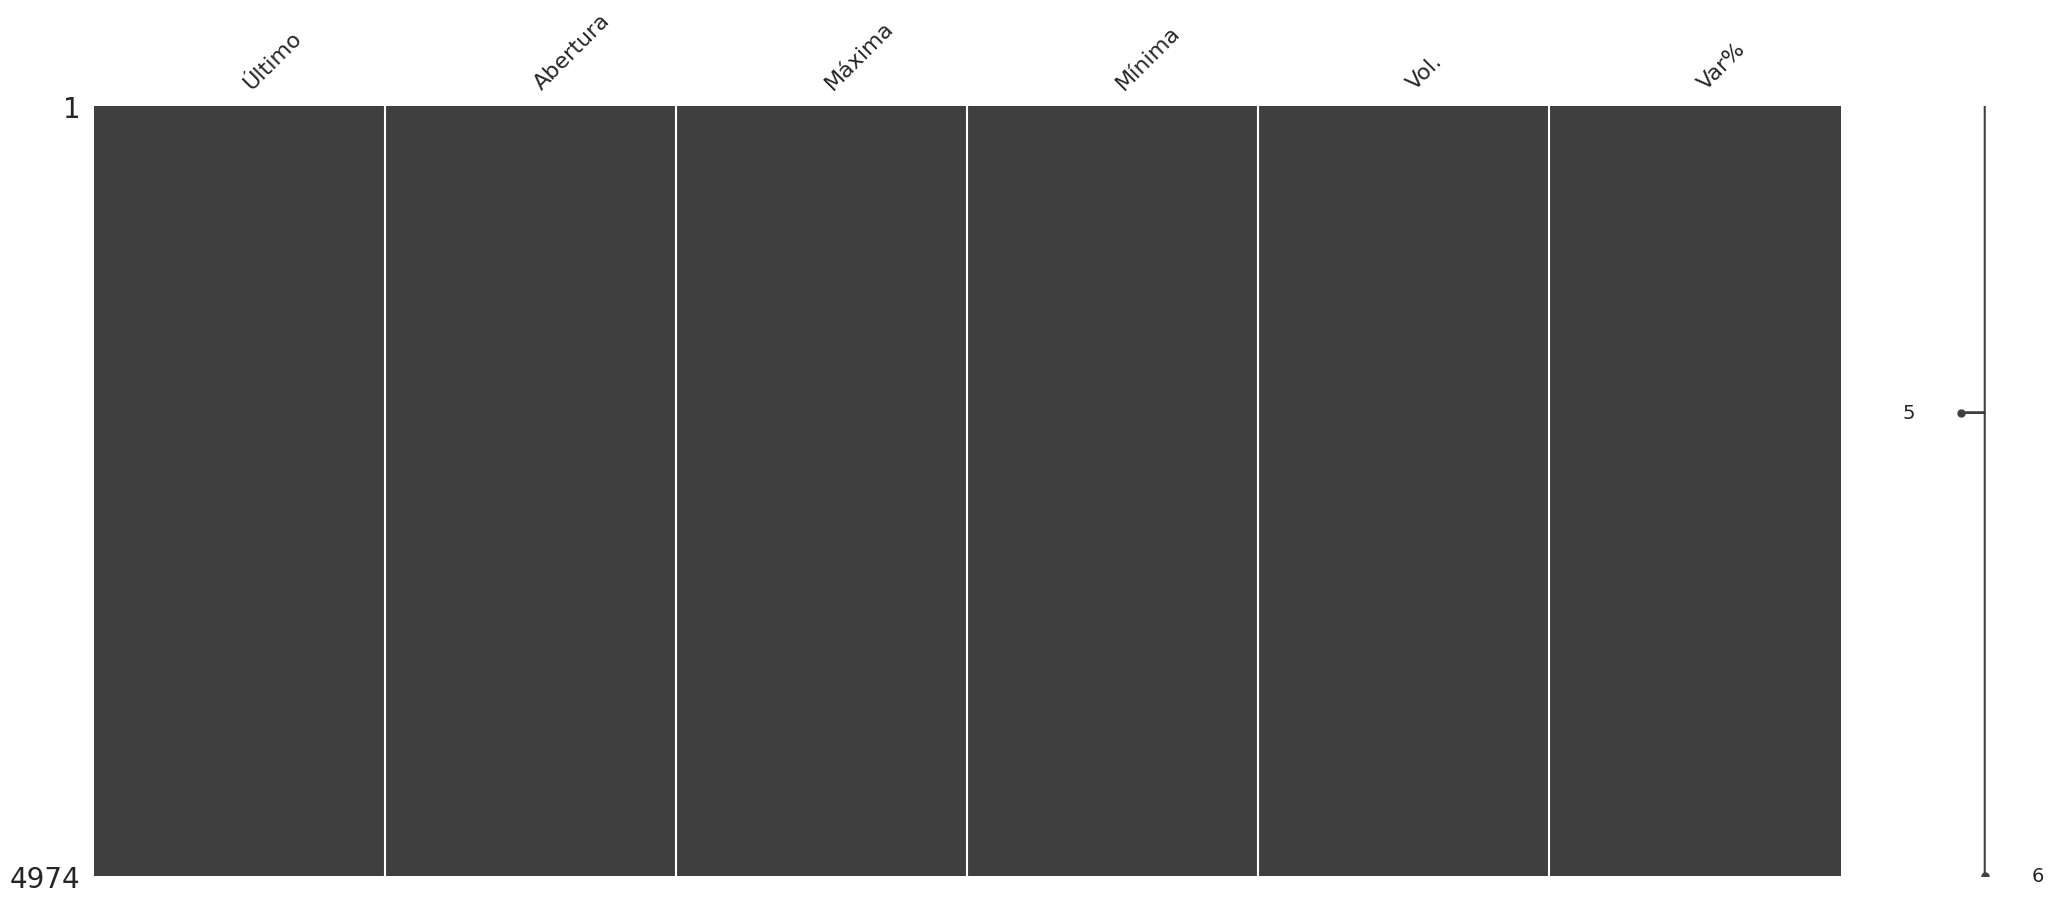

In [99]:
#Dados Nulos
import missingno as msno
msno.matrix(dados)

In [100]:
dados.isnull().sum()

Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        1
Var%        0
dtype: int64

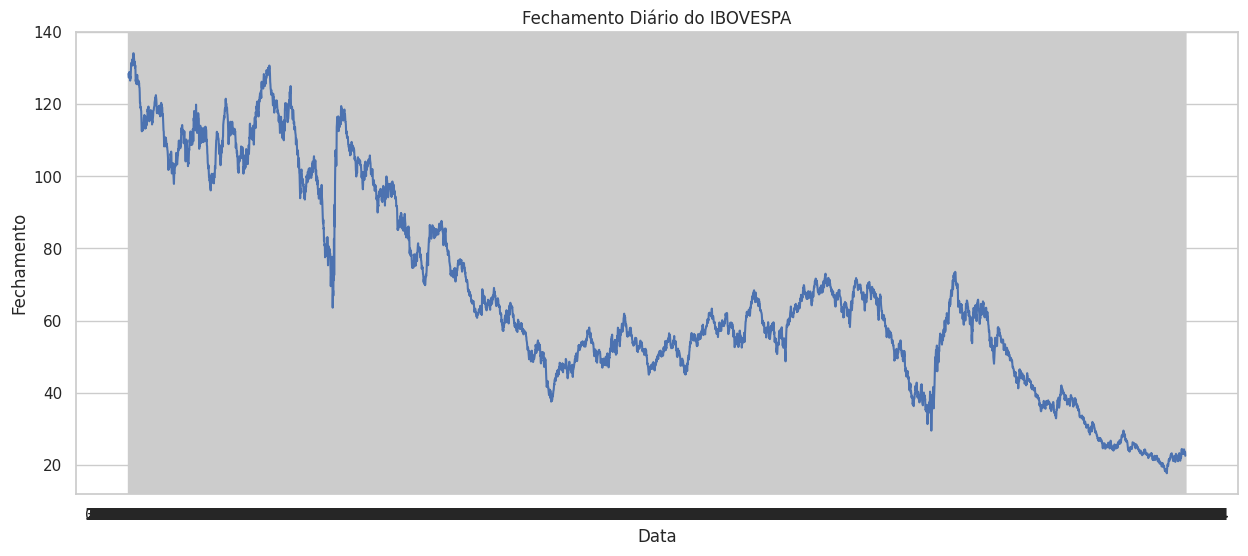

In [101]:
plt.figure(figsize=(15, 6))
plt.plot(dados['Último'])
plt.title('Fechamento Diário do IBOVESPA')
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.show()



* O objetivo do gráfico é identificar anomalias nos dados, como outliers. Observamos que, em 2004, o valor de fechamento estava entre 120 e 140. Ao longo do tempo, esses valores oscilaram até que, em uma data específica (não visível na apresentação inicial do gráfico), ocorreu uma queda acentuada. Após essa queda, houve uma recuperação significativa. No entanto, até o ano de 2024, os valores apresentaram uma tendência de queda contínua.

Essa análise preliminar sugere a necessidade de uma investigação mais detalhada para identificar os fatores que causaram essas variações extremas e as tendências de longo prazo no valor de fechamento da Bovespa.

### Gráfico Boxplot para Detectar Outliers:

In [102]:
import seaborn as sns

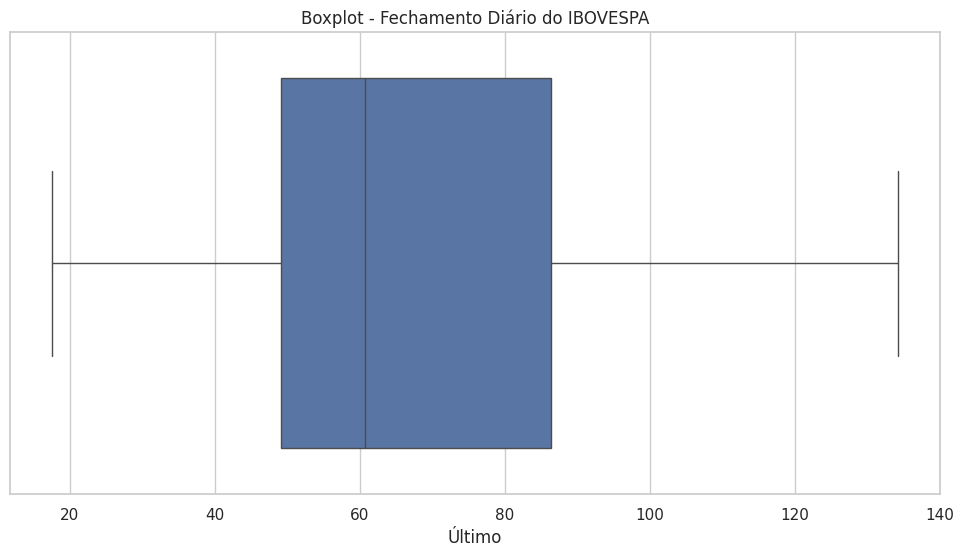

In [103]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(figsize=(12,6))
sns.boxplot(x=dados['Último'], data=dados)
axes.set_title('Boxplot - Fechamento Diário do IBOVESPA')
plt.show()


Os dados estão concentrados enttre 50 e 85 e não foram encontrados outliers

### Violin Plot para Ver Distribuição:

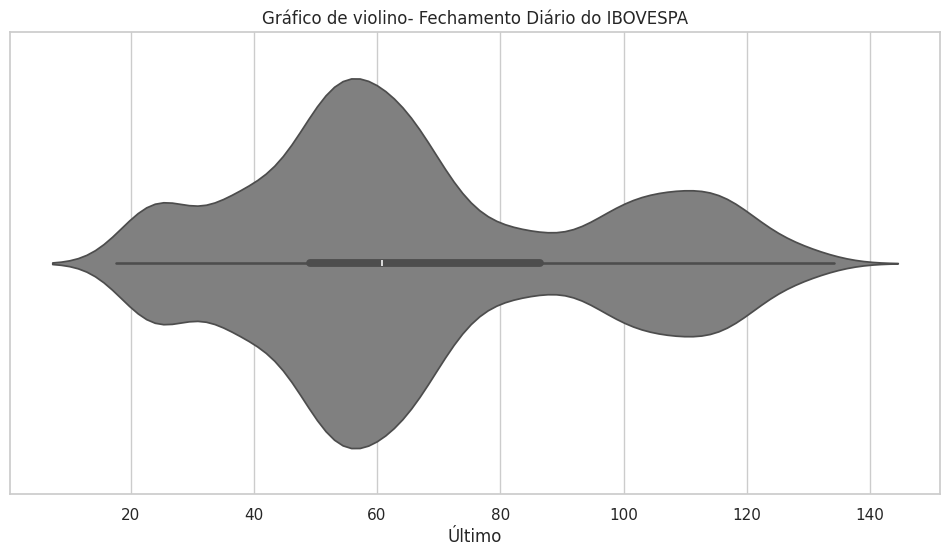

In [104]:
fig, axes = plt.subplots(figsize=(12,6))
sns.violinplot(x=dados['Último'], data=dados, color='gray')
axes.set_title('Gráfico de violino- Fechamento Diário do IBOVESPA')
plt.show()


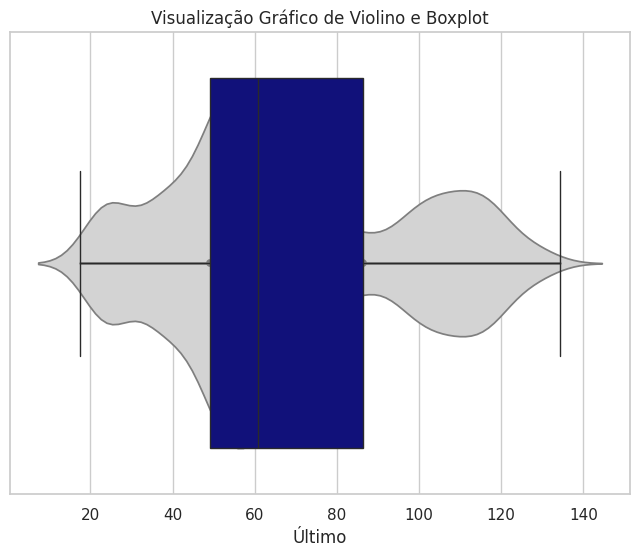

In [105]:
fig, ax = plt.subplots(figsize=(8,6))
sns.violinplot(x=dados['Último'], data=dados, ax=ax, color='lightgray')
sns.boxplot(x=dados['Último'], data=dados, ax=ax, whis=1.5, color='darkblue')
ax.set_title('Visualização Gráfico de Violino e Boxplot')

plt.show()

### Heatmap de Correlações:

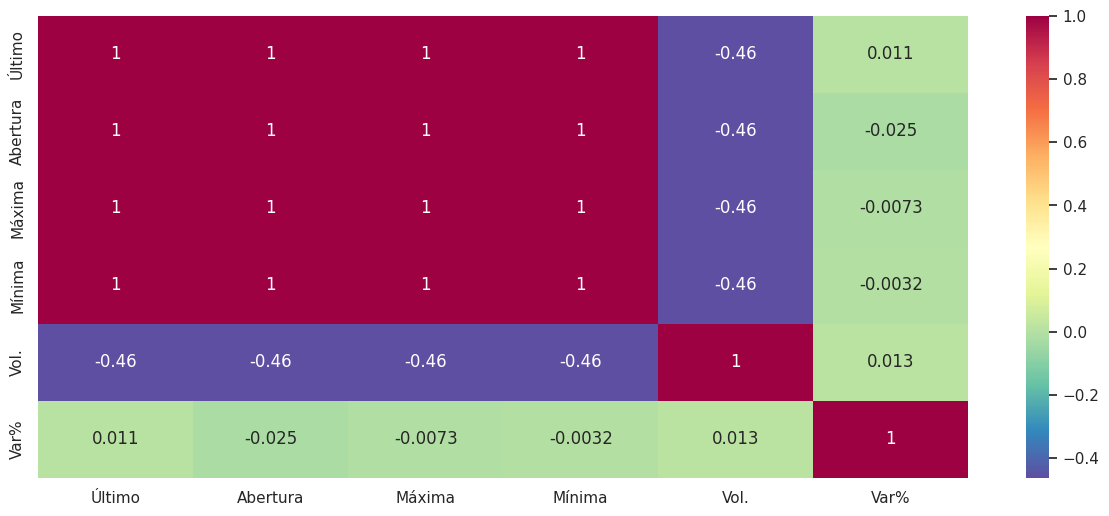

In [106]:
numeric_dados = dados.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_dados.corr()

# Plot the heatmap
plt.figure(figsize=(15, 6))
corr = sns.heatmap(correlation_matrix, annot=True, cmap="Spectral_r")
plt.show()

## Análise Temporal

### Decomposição da Série Temporal:

In [107]:
dados.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
01.02.2024,128.481,127.752,128.481,127.284,10230000.0,0.57
31.01.2024,127.752,127.402,129.558,127.326,12500000.0,0.28
30.01.2024,127.402,128.492,128.492,127.105,10040000.0,-0.86
29.01.2024,128.503,128.970,129.068,127.853,8760000.0,-0.36
26.01.2024,128.967,128.196,129.252,127.869,8510000.0,0.62


In [108]:
# Agrupa os dados por ano e conta o número de entradas.
dados['Data'] = pd.to_datetime(dados.index, format='%d.%m.%Y', dayfirst=True)
dados['anual_dias'] = dados['Data'].dt.year

days_per_year = dados.groupby('anual_dias').size()

print(sum(days_per_year)/20)

248.7


In [109]:
!pip install statsmodels

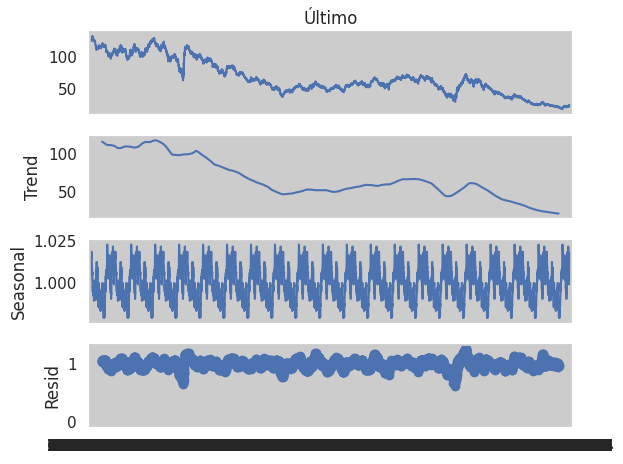

In [110]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(dados['Último'], model='multiplicative', period=248) # Assumindo um ano de 248 dias úteis
result.plot()
plt.show()

### Autocorrelação e Autocorrelação Parcial

<Figure size 1400x700 with 0 Axes>

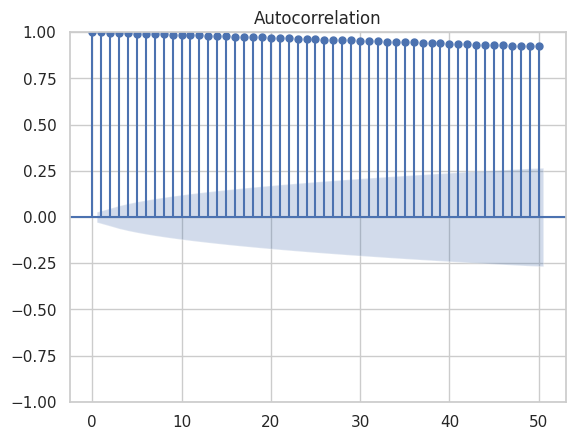

<Figure size 1400x700 with 0 Axes>

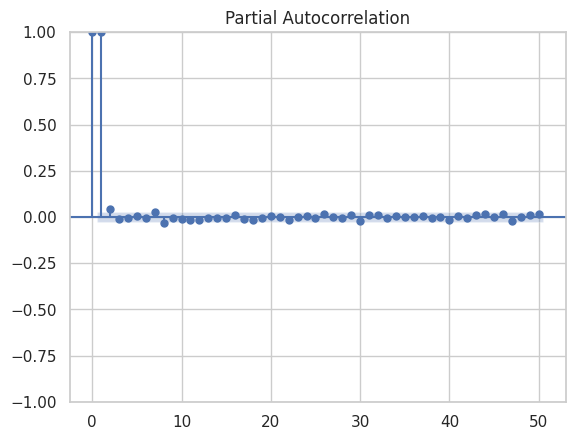

In [111]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# gráficos de autocorrelação e autocorrelação parcial para entender as dependências temporais nos dados.
plt.figure(figsize=(14, 7))
plot_acf(dados['Último'], lags=50)
plt.show()

plt.figure(figsize=(14, 7))
plot_pacf(dados['Último'], lags=50)
plt.show()

## Feature Engineering (Normalização e Padronização)

* Extração de Componentes de Data: Essas features podem ajudar a capturar padrões sazonais.

In [112]:
dados['Data'] = pd.to_datetime(dados.index, format='%d.%m.%Y', dayfirst=True)
dados['Dia'] = dados['Data'].dt.day
dados['Mês'] = dados['Data'].dt.month
dados['Ano'] = dados['Data'].dt.year
dados['Trimestre'] = dados['Data'].dt.quarter
dados['Dia_da_Semana'] = dados['Data'].dt.dayofweek
dados['Fim_de_Semana'] = dados['Dia_da_Semana'].apply(lambda x: 1 if x >= 5 else 0)

In [113]:
# Criação de lags: Lags são valores defasados de uma série temporal, ou seja, os valores anteriores a um ponto no tempo. Eles são usados para capturar dependências temporais nos dados.
# Na modelagem de séries temporais, os lags ajudam a prever o valor atual com base nos valores passados.

dados['Lag_1'] = dados['Último'].shift(1)  # shift() desloca a série temporal em n períodos, criando novas colunas.
dados['Lag_5'] = dados['Último'].shift(5)
dados['Lag_10'] = dados['Último'].shift(10)

# Criação de médias móveis

dados['MA_5'] = dados['Último'].rolling(window=5).mean()
dados['MA_10'] = dados['Último'].rolling(window=10).mean()
dados['MA_20'] = dados['Último'].rolling(window=20).mean()

In [114]:
# Média Móvel Exponencial
dados['EMA_10'] = dados['Último'].ewm(span=10, adjust=False).mean()
dados['EMA_20'] = dados['Último'].ewm(span=20, adjust=False).mean()

* Índice de Força Relativa (RSI): O Índice de Força Relativa (RSI) é um indicador técnico que mede a magnitude das recentes mudanças de preço para avaliar as condições de sobrecompra ou sobrevenda de um ativo.

(https://medium.com/@farrago_course0f/using-python-and-rsi-to-generate-trading-signals-a56a684fb1)


In [115]:
def calcular_RSI(data, window):
    delta = data.diff(1) # diff(1): Calcula a diferença entre o preço atual e o preço anterior
    gain = delta.where(delta > 0, 0) # Mantém as diferenças positivas e define as negativas como 0.
    loss = -delta.where(delta < 0, 0) # Mantém as diferenças negativas (como valores positivos) e define as positivas como 0.

    avg_gain = gain.rolling(window=window, min_periods=1).mean() # Calcula a média móvel dos ganhos e perdas.
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss # Relativa Força: ratio de ganho médio para perda média
    rsi = 100 - (100 / (1 + rs))
    return rsi

dados['RSI_14'] = calcular_RSI(dados['Último'], 14)

In [116]:
display(dados)

,Último,Abertura,Máxima,Mínima,Vol.,Var%,Data,anual_dias,Dia,Mês,...,Fim_de_Semana,Lag_1,Lag_5,Lag_10,MA_5,MA_10,MA_20,EMA_10,EMA_20,RSI_14
Data,,,,,,,,,,,,,,,,,,,,,
01.02.2024,128.481,127.752,128.481,127.284,10230000.0,0.57,2024-02-01,2024,1,2,...,0,NaN,NaN,NaN,NaN,NaN,NaN,128.481000,128.481000,NaN
31.01.2024,127.752,127.402,129.558,127.326,12500000.0,0.28,2024-01-31,2024,31,1,...,0,128.481,NaN,NaN,NaN,NaN,NaN,128.348455,128.411571,0.000000
30.01.2024,127.402,128.492,128.492,127.105,10040000.0,-0.86,2024-01-30,2024,30,1,...,0,127.752,NaN,NaN,NaN,NaN,NaN,128.176372,128.315422,0.000000
29.01.2024,128.503,128.970,129.068,127.853,8760000.0,-0.36,2024-01-29,2024,29,1,...,0,127.402,NaN,NaN,NaN,NaN,NaN,128.235759,128.333286,50.504587
26.01.2024,128.967,128.196,129.252,127.869,8510000.0,0.62,2024-01-26,2024,26,1,...,0,128.503,NaN,NaN,128.2210,NaN,NaN,128.368712,128.393640,59.190620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
08.01.2004,23.717,23.334,23.718,23.122,436740000.0,1.70,2004-01-08,2004,8,1,...,0,23.917,22.962,22.969,23.8420,23.5693,23.22755,23.609230,23.290177,48.676730
07.01.2004,23.320,23.576,23.899,23.320,464080000.0,-1.09,2004-01-07,2004,7,1,...,0,23.717,23.399,23.302,23.8262,23.5711,23.30930,23.556643,23.293018,41.159251
06.01.2004,23.576,23.532,23.976,23.180,472380000.0,0.19,2004-01-06,2004,6,1,...,0,23.320,23.940,23.679,23.7534,23.5608,23.37405,23.560162,23.319968,42.636986


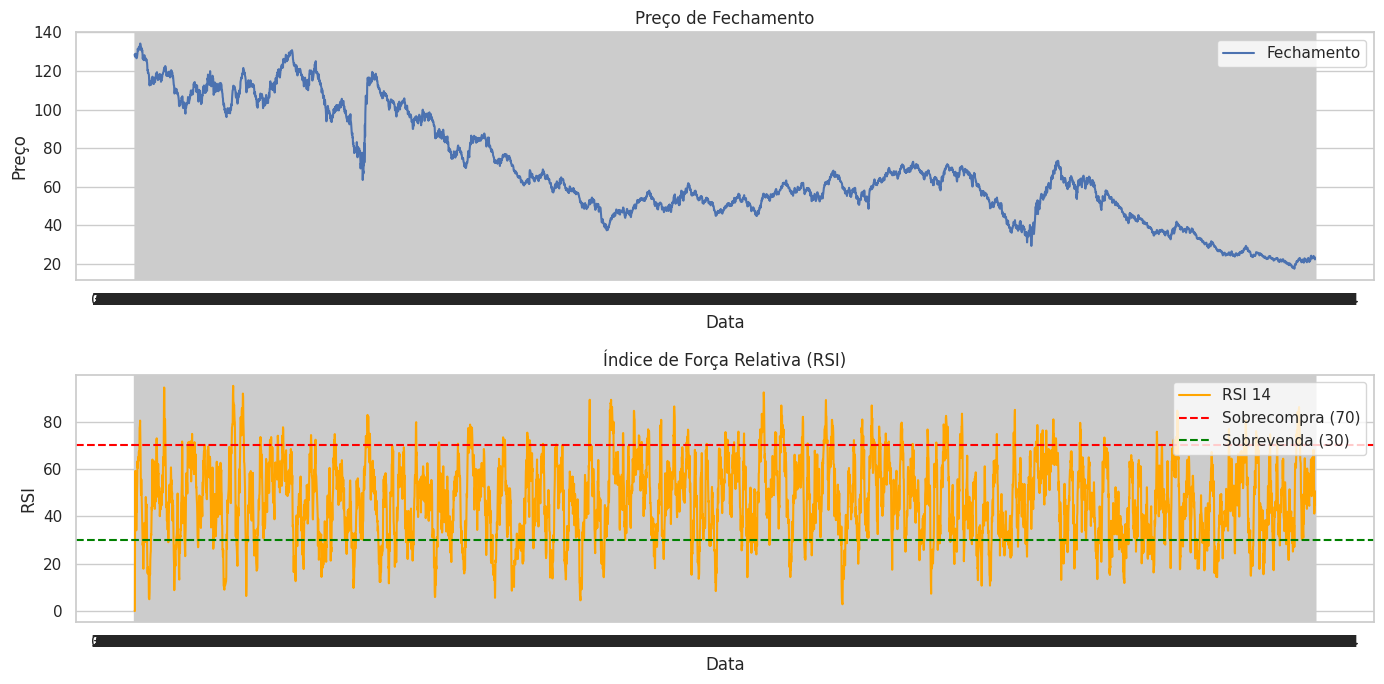

In [117]:
plt.figure(figsize=(14, 7))

# Preço de fechamento
plt.subplot(2, 1, 1)
plt.plot(dados['Último'], label='Fechamento')
plt.title('Preço de Fechamento')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()

# RSI
plt.subplot(2, 1, 2)
plt.plot(dados['RSI_14'], label='RSI 14', color='orange')
plt.axhline(y=70, color='red', linestyle='--', label='Sobrecompra (70)')
plt.axhline(y=30, color='green', linestyle='--', label='Sobrevenda (30)')
plt.title('Índice de Força Relativa (RSI)')
plt.xlabel('Data')
plt.ylabel('RSI')
plt.legend()

plt.tight_layout()
plt.show()

Se o RSI está acima de 70, pode indicar que o ativo está sobrecomprado, sugerindo que o preço pode estar alto demais e pode ocorrer uma correção ou queda em breve.

Se o RSI está abaixo de 30, pode indicar que o ativo está sobrevendido, sugerindo que o preço pode estar baixo demais e pode ocorrer uma recuperação ou aumento em breve.

* Bandas de Bollinger: As Bandas de Bollinger são um indicador de volatilidade que cria uma banda superior e uma inferior em torno de uma média móvel simples.
https://algobulls.github.io/pyalgotrading/strategies/bollinger_bands/

In [118]:
def calcular_bollinger_bands(data, window):
    MA = data.rolling(window=window).mean() # Calcula a média móvel simples.
    std = data.rolling(window=window).std() # Calcula o desvio padrão móvel
    upper_band = MA + (std * 2)
    lower_band = MA - (std * 2)
    return upper_band, lower_band

dados['Upper_BB'], dados['Lower_BB'] = calcular_bollinger_bands(dados['Último'], 20)

In [119]:
display(dados)

,Último,Abertura,Máxima,Mínima,Vol.,Var%,Data,anual_dias,Dia,Mês,...,Lag_5,Lag_10,MA_5,MA_10,MA_20,EMA_10,EMA_20,RSI_14,Upper_BB,Lower_BB
Data,,,,,,,,,,,,,,,,,,,,,
01.02.2024,128.481,127.752,128.481,127.284,10230000.0,0.57,2024-02-01,2024,1,2,...,NaN,NaN,NaN,NaN,NaN,128.481000,128.481000,NaN,NaN,NaN
31.01.2024,127.752,127.402,129.558,127.326,12500000.0,0.28,2024-01-31,2024,31,1,...,NaN,NaN,NaN,NaN,NaN,128.348455,128.411571,0.000000,NaN,NaN
30.01.2024,127.402,128.492,128.492,127.105,10040000.0,-0.86,2024-01-30,2024,30,1,...,NaN,NaN,NaN,NaN,NaN,128.176372,128.315422,0.000000,NaN,NaN
29.01.2024,128.503,128.970,129.068,127.853,8760000.0,-0.36,2024-01-29,2024,29,1,...,NaN,NaN,NaN,NaN,NaN,128.235759,128.333286,50.504587,NaN,NaN
26.01.2024,128.967,128.196,129.252,127.869,8510000.0,0.62,2024-01-26,2024,26,1,...,NaN,NaN,128.2210,NaN,NaN,128.368712,128.393640,59.190620,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
08.01.2004,23.717,23.334,23.718,23.122,436740000.0,1.70,2004-01-08,2004,8,1,...,22.962,22.969,23.8420,23.5693,23.22755,23.609230,23.290177,48.676730,24.901332,21.553768
07.01.2004,23.320,23.576,23.899,23.320,464080000.0,-1.09,2004-01-07,2004,7,1,...,23.399,23.302,23.8262,23.5711,23.30930,23.556643,23.293018,41.159251,24.817367,21.801233
06.01.2004,23.576,23.532,23.976,23.180,472380000.0,0.19,2004-01-06,2004,6,1,...,23.940,23.679,23.7534,23.5608,23.37405,23.560162,23.319968,42.636986,24.805475,21.942625


In [120]:
import matplotlib.pyplot as plt

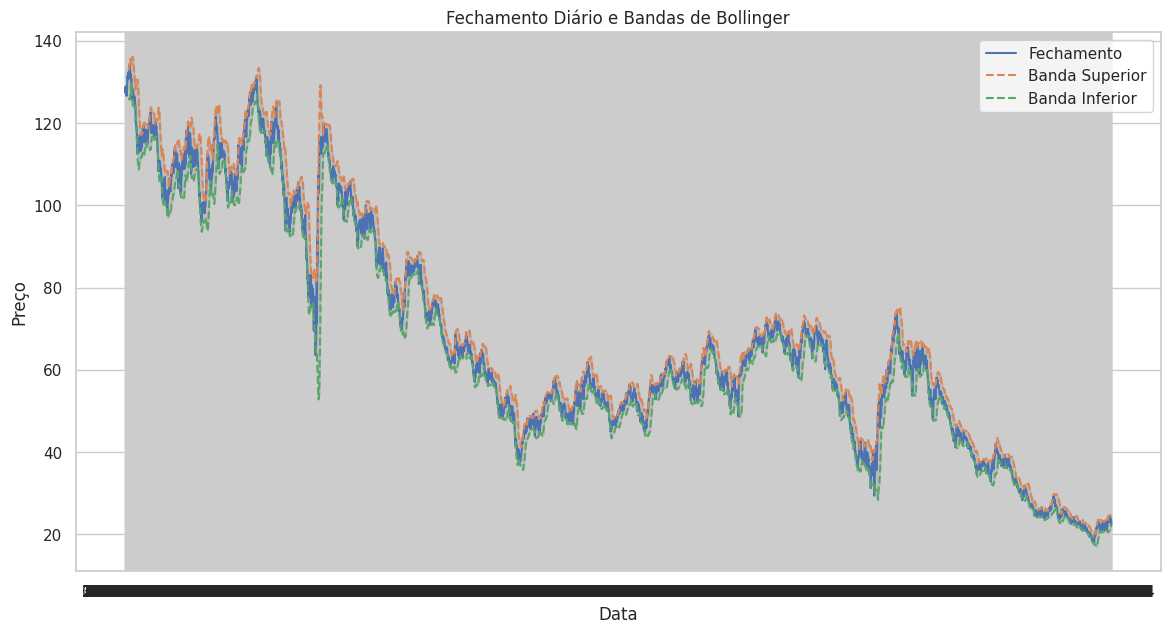

In [121]:

plt.figure(figsize=(14, 7))
plt.plot(dados['Último'], label='Fechamento')
plt.plot(dados['Upper_BB'], label='Banda Superior', linestyle='--')
plt.plot(dados['Lower_BB'], label='Banda Inferior', linestyle='--')
plt.fill_between(dados.index, dados['Upper_BB'], dados['Lower_BB'], color='gray', alpha=0.2)
plt.title('Fechamento Diário e Bandas de Bollinger')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.show()

# As Bandas de Bollinger fornecem uma faixa de preço dentro da qual o ativo geralmente oscila, ajudando a identificar pontos de sobrecompra e sobrevenda.
# Quando o preço se aproxima ou ultrapassa as bandas, pode sinalizar uma possível reversão ou continuação da tendência.

* Volume e Volatilidade: O volume de negociações e a volatilidade são características importantes para entender a dinâmica do mercado. Eles ajudam a medir a atividade do mercado e a instabilidade dos preços, respectivamente.

In [122]:
dados['Var%'] = dados['Último'].pct_change() * 100 # Calcula a mudança percentual entre o preço atual e o preço anterior.

# A variação percentual diária mostra a mudança percentual no preço de fechamento de um dia para o próximo. É útil para medir a amplitude das mudanças diárias.

In [123]:
dados['Volatilidade_10'] = dados['Var%'].rolling(window=10).std() # Calcula o desvio padrão móvel para os últimos 10 dias, representando a volatilidade.
dados['Volatilidade_20'] = dados['Var%'].rolling(window=20).std()

# A volatilidade mede a variação do preço de um ativo ao longo do tempo. Ela indica o quão estável ou instável é o preço do ativo. Altos valores de volatilidade significam grandes
# flutuações no preço, enquanto baixos valores indicam flutuações menores.

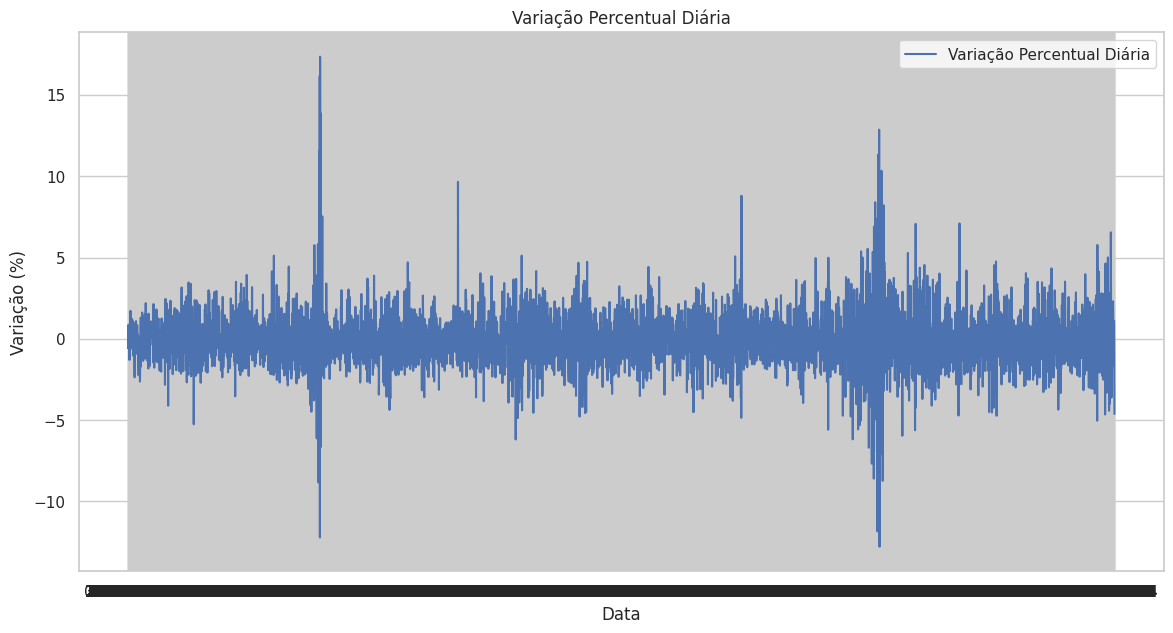

In [124]:
plt.figure(figsize=(14, 7))
plt.plot(dados['Var%'], label='Variação Percentual Diária')
plt.title('Variação Percentual Diária')
plt.xlabel('Data')
plt.ylabel('Variação (%)')
plt.legend()
plt.show()

Melhorar a variacao percentual diaria ***********************

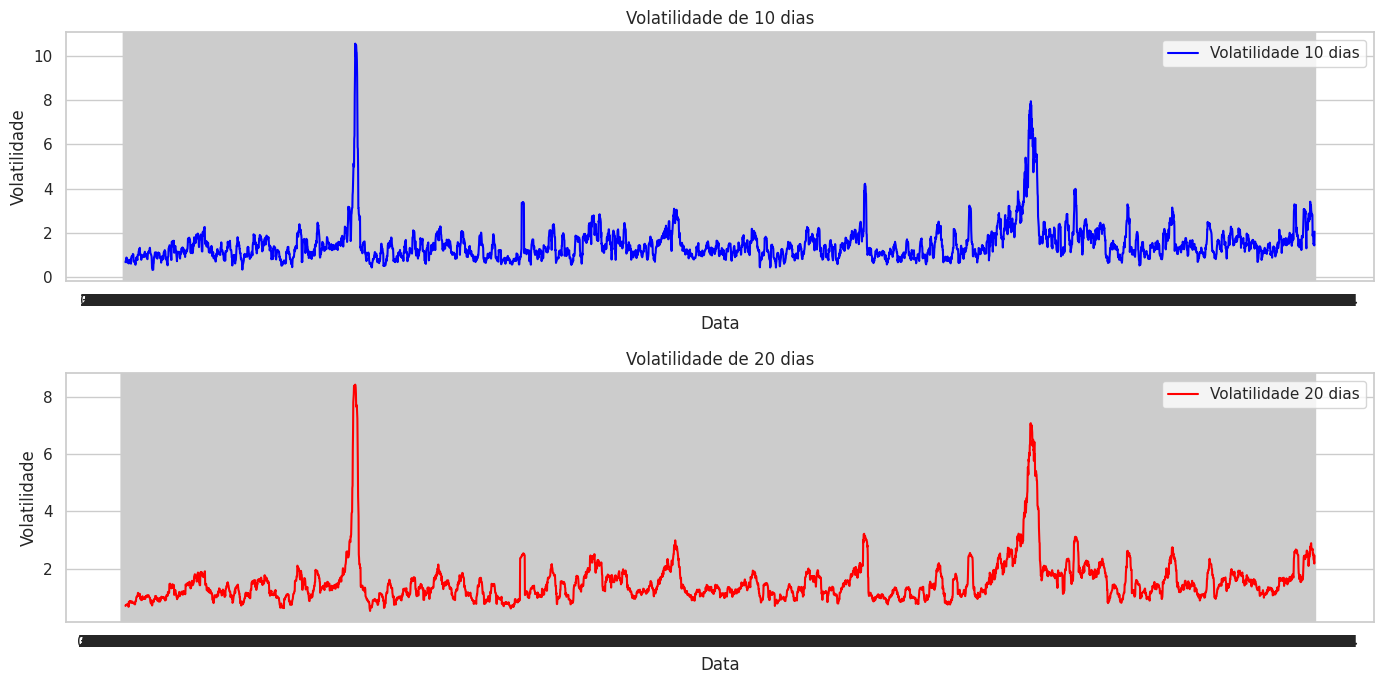

In [125]:
plt.figure(figsize=(14, 7))

# Volatilidade de 10 dias
plt.subplot(2, 1, 1)
plt.plot(dados['Volatilidade_10'], label='Volatilidade 10 dias', color='blue')
plt.title('Volatilidade de 10 dias')
plt.xlabel('Data')
plt.ylabel('Volatilidade')
plt.legend()

# Volatilidade de 20 dias
plt.subplot(2, 1, 2)
plt.plot(dados['Volatilidade_20'], label='Volatilidade 20 dias', color='red')
plt.title('Volatilidade de 20 dias')
plt.xlabel('Data')
plt.ylabel('Volatilidade')
plt.legend()

plt.tight_layout()
plt.show()

In [126]:
dados = dados.dropna()


In [127]:
print(dados.head())

             Último  Abertura   Máxima   Mínima       Vol.      Var%  \
Data                                                                   
04.01.2024  131.226   132.831  132.885  131.024  8970000.0 -0.603683   
03.01.2024  132.834   132.697  133.576  132.250  8700000.0  1.225367   
02.01.2024  132.697   134.186  134.195  132.095  8440000.0 -0.103136   
28.12.2023  134.185   134.194  134.392  133.832  7810000.0  1.121352   
27.12.2023  134.194   133.523  134.195  133.328  6170000.0  0.006707   

                 Data  anual_dias  Dia  Mês  ...      MA_5     MA_10  \
Data                                         ...                       
04.01.2024 2024-01-04        2024    4    1  ...  131.5928  130.8940   
03.01.2024 2024-01-03        2024    3    1  ...  131.9914  131.3250   
02.01.2024 2024-01-02        2024    2    1  ...  132.2414  131.6653   
28.12.2023 2023-12-28        2023   28   12  ...  132.5930  131.9317   
27.12.2023 2023-12-27        2023   27   12  ...  133.0272  132

## Treinamento do Modelo

In [128]:
features = ['Abertura', 'Máxima', 'Mínima', 'Vol.', 'Dia', 'Mês', 'Ano', 'Trimestre', 'Dia_da_Semana',
            'Fim_de_Semana', 'Lag_1', 'Lag_5', 'Lag_10', 'MA_5', 'MA_10', 'MA_20', 'EMA_10', 'EMA_20',
            'RSI_14', 'Upper_BB', 'Lower_BB', 'Var%', 'Volatilidade_10', 'Volatilidade_20']
target = 'Último'

X = dados[features]
y = dados[target]

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [130]:
from sklearn.linear_model import LinearRegression

In [131]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [132]:
predicoes = modelo.predict(X_test)

In [133]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predicoes)
print(f"Erro Quadrático Médio (MSE): {mse}")

Erro Quadrático Médio (MSE): 0.7021193823216705


In [134]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predicoes)
print(f"Coeficiente de Determinação (R²): {r2}")

Coeficiente de Determinação (R²): 0.99547026877569


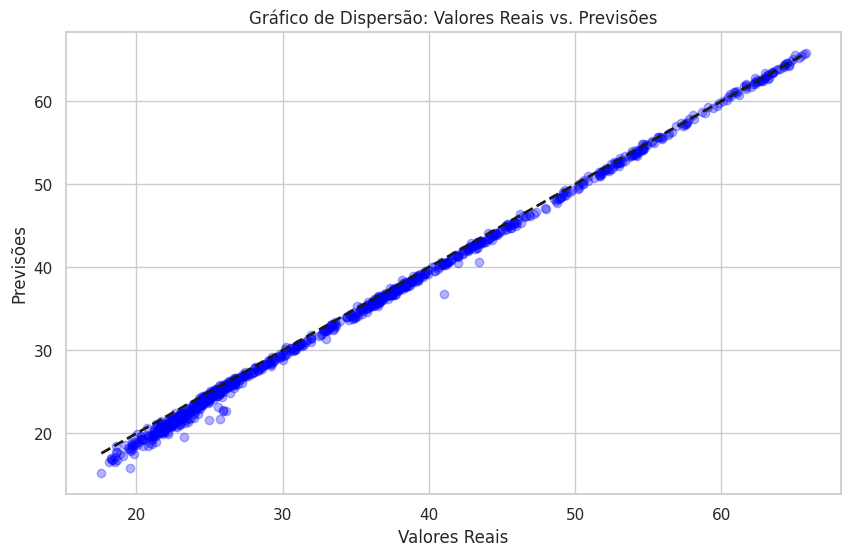

In [135]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicoes, color='blue', alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Gráfico de Dispersão: Valores Reais vs. Previsões')
plt.show()

* Todos os pontos estão próximos da linha diagonal, o que indica que as previsões do modelo estão bastante alinhadas com os valores reais. Isso é um excelente sinal de que o modelo está capturando bem a variação nos dados de fechamento da IBOVESPA.

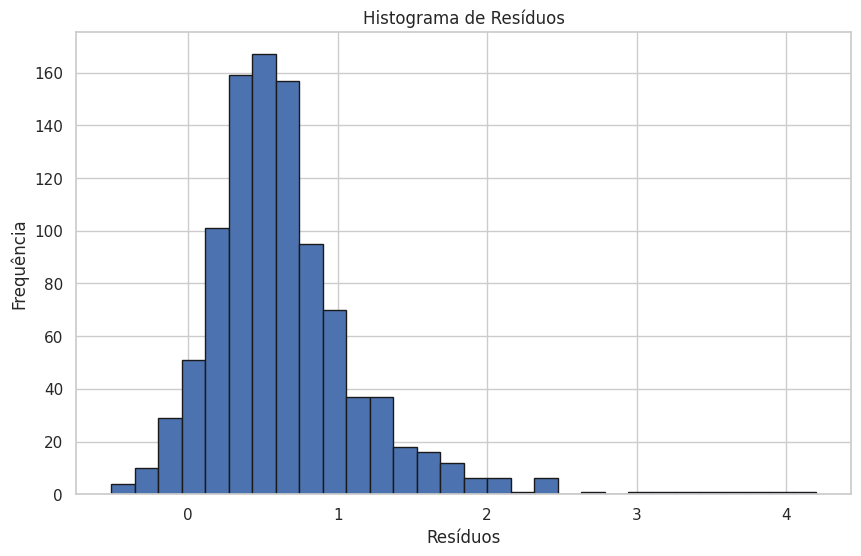

In [136]:
residuos = y_test - predicoes

plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=30, edgecolor='k')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma de Resíduos')
plt.show()

https://medium.com/turing-talks/como-avaliar-seu-modelo-de-regress%C3%A3o-c2c8d73dab96

* Os resíduos estão distribuídos de maneira aproximadamente normal em torno de zero. Isso sugere que o modelo não possui viés sistemático e está capturando a maior parte da variabilidade dos dados. A presença de uma distribuição normal nos resíduos é uma condição desejável para modelos de regressão.

### **ARVORE DE DECISÃO (DecisionTreeRegressor)**

Modelo de Arvore de Decisão: Um modelo de DecisionTreeRegressor é um modelo de árvore de decisão utilizado para resolver problemas de regressão. Esse tipo de técnica cria uma estrutura em forma de árvore para mapear relações não lineares entre as variáveis preditoras e a variável alvo.



In [163]:
#Importanto as bibliotecas
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import graphviz

#Instanciando meu modelo
model_dtr = DecisionTreeRegressor(random_state=7, max_depth=10)

# Criando o modelo de DecisionTreeRegressor
model_dtr.fit(X_train, y_train)

#previsão usando um modelo de árvore de decisão
y_pred_model_dtr = model_dtr.predict(X_test)


#AVALIANDO O MODELO
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean Absolute Error (MAE) é a média do valor absoluto dos erros.
MAE = mean_absolute_error(y_test, y_pred_model_dtr)
print('MAE',MAE)

 # Erro Quadrático Médio (MSE) é a média dos erros quadráticos
MSE = mean_squared_error(y_test, y_pred_model_dtr)
print('MSE',MSE)

 # (R-quadrado)
r2 = r2_score(y_test, y_pred_model_dtr)
print('r²',r2)

MAE 4.478076456896349
MSE 42.23433868393984
r² 0.7275246809992237


# **CONCLUSÃO**

No modelo de arvore de decisão (DecisionTreeClassifier) mostrou que o r2 Quadrado foi o que melhor performou com 73%

**EXEMPLO 1 DE GRAFICO**

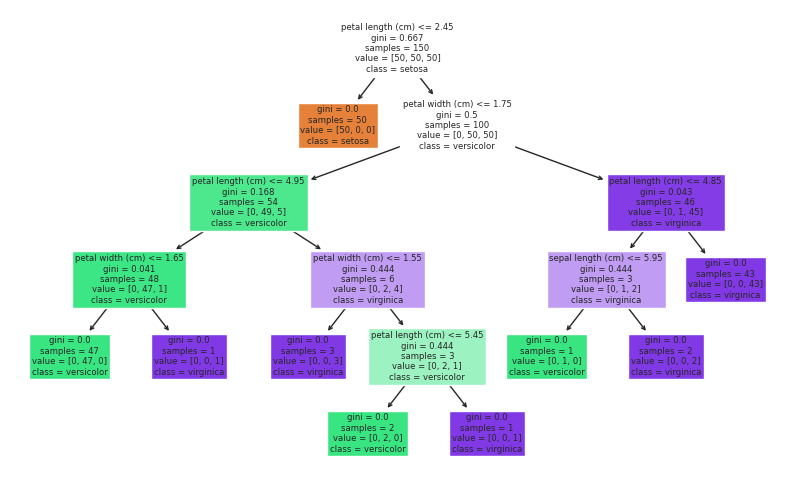

In [164]:
# Visualize a árvore de decisão
plt.figure(figsize=(10, 6))
tree.plot_tree(model, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

**EXEMPLO 2 DE GRAFICO**

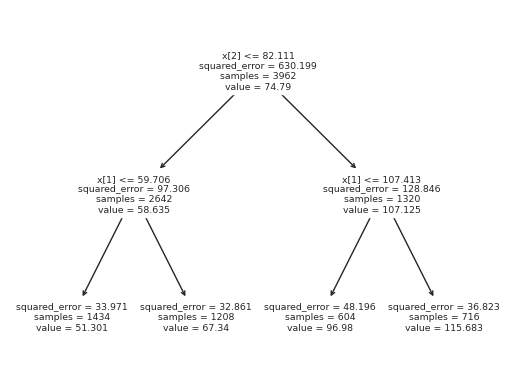

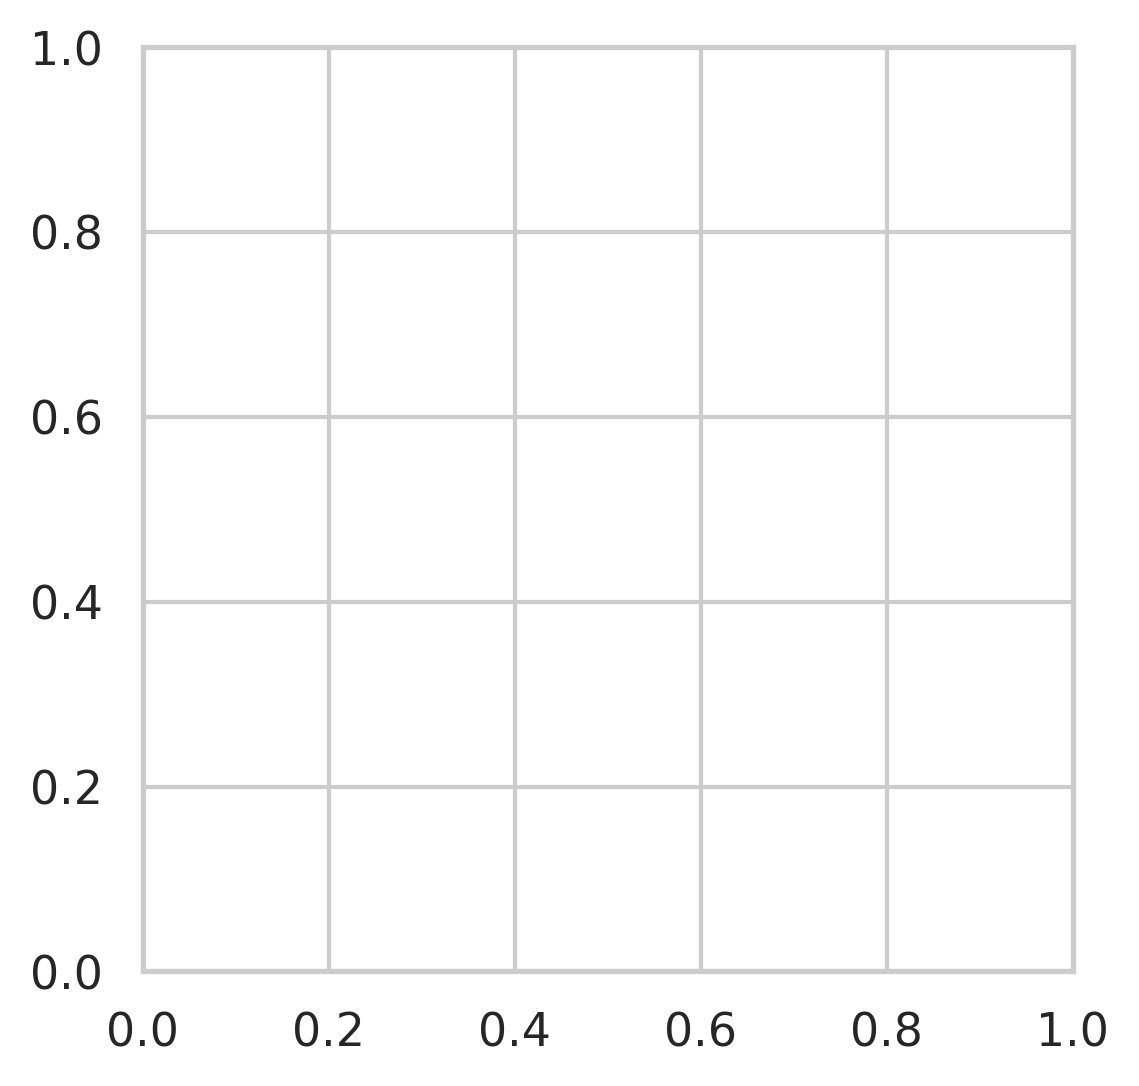

In [153]:
#Visão Grafica do modelo
tree.plot_tree(model_dtr)
class_names = ['Classe 0', 'Classe 1']
label_names = ['Classe 0', 'Classe 1']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)

plt.show()

Não consegui ter uma interpretação do grafico de arvore de decisão.. preciso de ajuda.

# **ARVORE DE DECISÃO (RandomForestClassifier)**

O RandomForestClassifier é um classificador de floresta aleatória em Python. Ele faz parte da biblioteca scikit-learn e é usado para resolver problemas de classificação. Aqui estão os principais pontos sobre o RandomForestClassifier:

O que é uma Floresta Aleatória? Uma floresta aleatória é um metaestimador que combina vários classificadores de árvore de decisão em subamostras diferentes do conjunto de dados. Ela usa a média das previsões dessas árvores para melhorar a precisão preditiva e controlar o overfitting.

Como funciona: Cada árvore na floresta é treinada em uma subamostra aleatória dos dados. As árvores usam a melhor estratégia de divisão (equivalente a passar splitter="best" para o DecisionTreeRegressor subjacente). A floresta combina as previsões de todas as árvores para obter uma previsão final.

Parâmetros importantes: n_estimators: O número de árvores na floresta. criterion: A função para medir a qualidade de uma divisão (por exemplo, “gini” ou “entropy”). max_depth: A profundidade máxima da árvore. E outros parâmetros relacionados à divisão e tamanho mínimo das amostras.

Fonte: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Visão Grafica do modelo

In [160]:
from sklearn.ensemble import RandomForestClassifier

# Instanciando o modelo de floresta aleatória
model_rf = RandomForestClassifier(n_estimators=10, random_state=7, max_depth=10)

# Treinando o modelo
model_rf.fit(X_train, y_train)

# Fazendo previsões usando o modelo treinado
y_pred_model_rf = model_rf.predict(X_test)


ValueError: Unknown label type: 'continuous'

Esse erro ocorre porque o modelo de classificação que você está tentando treinar espera rótulos categóricos (ou seja, classes discretas).

O problema está na variável y_train, que contém os rótulos das classes. Esses rótulos devem ser categóricos (por exemplo, “Classe 0” ou “Classe 1”), não valores contínuos.

Etapas para resolver o erro:

**Para esses dados não cabe o RandomForestClassifier**


In [161]:
# Instancie o LabelEncoder
label_encoder = LabelEncoder()

# Ajuste e transforme os rótulos
y_train_encoded = label_encoder.fit_transform(y_train)

NameError: name 'LabelEncoder' is not defined

## Resultados:

### Avaliação do modelo

### Visualização dos resultados

### Discussão sobre a acuracidade atingida

## Conclusão

### Sumário dos resultados

### Próximos passos

**Teste Debora**

Teste 2 Debora